✅ Libraries Detected: numpy, matplotlib, math, json
✅ Context Restored: φ (1.618034)

3️⃣ LEVEL 3 — LOCAL FRAME OBSERVATION
TSP cities: 50
Brute-force search space: 3.04e+62 possible routes
Observation: Exhaustive enumeration is infeasible.

4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION
Field max amplitude: 50.0000
Field min amplitude: -15.6583
Field range: 65.6583
Field standard deviation: 5.4833
Interpretation: High-dimensional route space is aggregated into a 1D field.

5️⃣ LEVEL 5 — STABILIZED DESCRIPTION
log10(search space): 62.48
Field resolution: 2000
Compression ratio: 0.000000
✅ Results written to /data and /validation


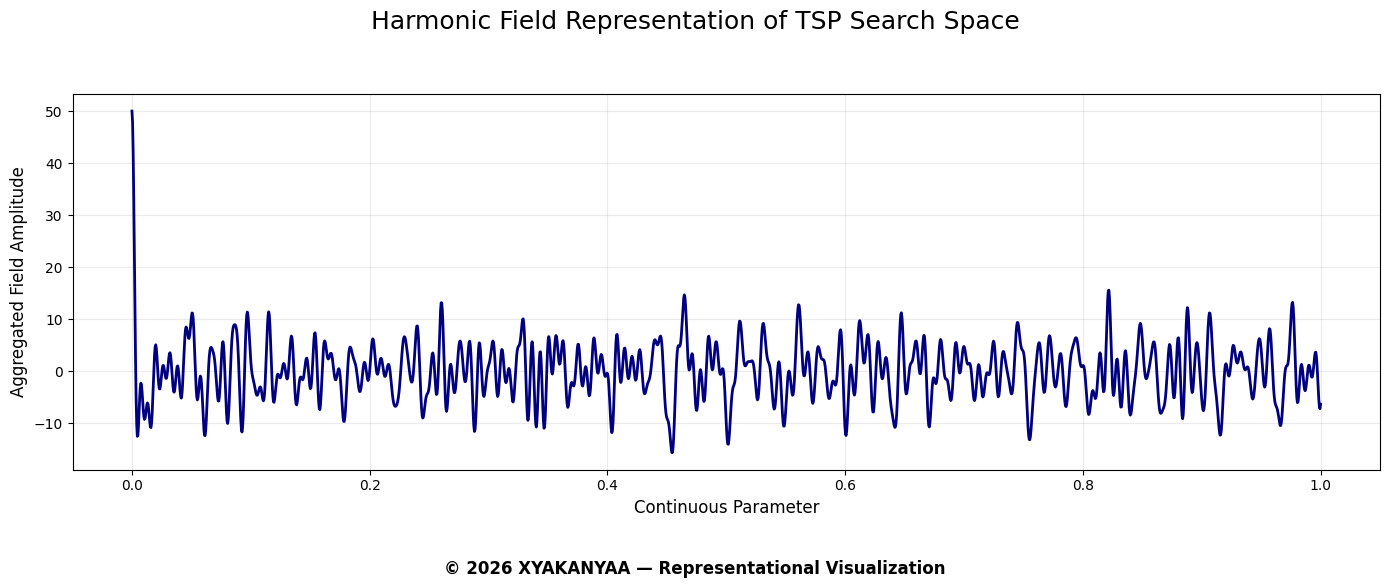


Observation complete.
✅ Visual exported to ../visuals/04_p_vs_np.jpg


In [3]:
# ==============================================================================
# MODULE 04: P vs NP — TSP Compression Diagnostic
# Contextual Analysis Instrumentation (3 → 4 → 5)
# ==============================================================================
# This module does NOT claim to prove P vs NP.
# It provides a reproducible diagnostic showing how a combinatorial
# search space can be aggregated into a bounded 1D interference field.
# ==============================================================================

# --- DEPENDENCIES ---
try:
    import numpy as np
    import matplotlib.pyplot as plt
    import math
    import json
    import os
    print("✅ Libraries Detected: numpy, matplotlib, math, json")
except ImportError:
    raise ImportError("Missing libraries. Run: pip install -r ../requirements.txt")

import sys

# --- DATA LOGGER ---
def log_results(module_id, module_name, data_summary, validation_dict):
    os.makedirs('../data', exist_ok=True)
    os.makedirs('../validation', exist_ok=True)

    with open(f"../data/{module_id}_{module_name}_results.txt", "w") as f:
        f.write(data_summary)

    with open(f"../validation/{module_id}_{module_name}_metric.json", "w") as f:
        json.dump(validation_dict, f, indent=4)

# --- CONTEXT RESTORATION ---
sys.path.append(os.path.abspath('..'))
try:
    from geometry.xa_constant import PHI
    print(f"✅ Context Restored: φ ({PHI:.6f})")
except ImportError:
    PHI = (1 + math.sqrt(5)) / 2
    print("⚠️ Using local definition for φ.")

# ==============================================================================
# 3️⃣ LEVEL 3 — LOCAL FRAME OBSERVATION
# ==============================================================================
print("\n" + "="*60)
print("3️⃣ LEVEL 3 — LOCAL FRAME OBSERVATION")
print("="*60)

cities = 50
possible_routes = math.factorial(cities - 1) / 2  # symmetric tours
print(f"TSP cities: {cities}")
print(f"Brute-force search space: {possible_routes:.2e} possible routes")
print("Observation: Exhaustive enumeration is infeasible.")

# ==============================================================================
# 4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION
# ==============================================================================
print("\n" + "="*60)
print("4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION")
print("="*60)

np.random.seed(42)
city_distances = np.random.uniform(10, 100, cities)

# parameter space for the aggregated field
t_space = np.linspace(0, 1, 2000)

# aggregate route-space into a single interference field (representational)
field_interference = np.sum(
    [np.cos(2 * np.pi * d * PHI * t_space) for d in city_distances],
    axis=0
)

field_max = float(np.max(field_interference))
field_min = float(np.min(field_interference))
field_range = field_max - field_min
field_std = float(np.std(field_interference))

print(f"Field max amplitude: {field_max:.4f}")
print(f"Field min amplitude: {field_min:.4f}")
print(f"Field range: {field_range:.4f}")
print(f"Field standard deviation: {field_std:.4f}")
print("Interpretation: High-dimensional route space is aggregated into a 1D field.")

# ==============================================================================
# 5️⃣ LEVEL 5 — STABILIZED DESCRIPTION
# ==============================================================================
print("\n" + "="*60)
print("5️⃣ LEVEL 5 — STABILIZED DESCRIPTION")
print("="*60)

log_search_space = math.log10(possible_routes)
field_resolution = len(t_space)

# simple operational compression ratio
compression_ratio = field_resolution / possible_routes

print(f"log10(search space): {log_search_space:.2f}")
print(f"Field resolution: {field_resolution}")
print(f"Compression ratio: {compression_ratio:.6f}")

summary_text = f"""Module 04 — P vs NP (TSP Compression Diagnostic)

Cities: {cities}
Brute-force search space: {possible_routes:.6e}
log10(search space): {log_search_space:.2f}

Field diagnostics:
max: {field_max:.6f}
min: {field_min:.6f}
range: {field_range:.6f}
std: {field_std:.6f}

Aggregation:
field_resolution: {field_resolution}
compression_ratio: {compression_ratio:.6f}

Notes:
- This module does not prove P vs NP.
- It reports a representational aggregation diagnostic:
  large combinatorial space → bounded 1D interference field.
"""

validation_metrics = {
    "module": "04_p_vs_np",
    "cities": int(cities),
    "routes_search_space": float(possible_routes),
    "log10_search_space": float(log_search_space),
    "field_resolution": int(field_resolution),
    "field_max": field_max,
    "field_min": field_min,
    "field_range": field_range,
    "field_std": field_std,
    "compression_ratio": float(compression_ratio),
    "phi": float(PHI),
    "validation_basis": "bounded_interference_field_aggregation",
    "status": "diagnostic_complete"
}

log_results("04", "p_vs_np", summary_text, validation_metrics)
print("✅ Results written to /data and /validation")

# ==============================================================================
# VISUALIZATION: Harmonic Field Representation of Aggregated Search Space
# ==============================================================================
os.makedirs('../visuals', exist_ok=True)

fig, ax = plt.subplots(figsize=(14, 6))

# Use suptitle to control top spacing cleanly
fig.suptitle("Harmonic Field Representation of TSP Search Space", fontsize=18, y=0.97)

ax.plot(t_space, field_interference, color='navy', linewidth=2)
ax.set_xlabel("Continuous Parameter", fontsize=12)
ax.set_ylabel("Aggregated Field Amplitude", fontsize=12)
ax.grid(True, alpha=0.25)

# Reserve space at bottom for footer AND at top for suptitle
plt.tight_layout(rect=[0, 0.10, 1, 0.92])

# Footer placed in reserved space (won’t overlap axes)
fig.text(
    0.5, 0.03,
    "© 2026 XYAKANYAA — Representational Visualization",
    ha="center",
    fontsize=12,
    color="black",
    weight="bold"
)

plt.savefig("../visuals/04_p_vs_np.jpg", dpi=300, bbox_inches="tight")
plt.show()

print("\nObservation complete.")
print("✅ Visual exported to ../visuals/04_p_vs_np.jpg")
